In [48]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul  5 23:13:39 2018

@author: Yuhao Ye
"""
import os
import numpy as np
import cv2
import glob as gb
import matplotlib.pyplot as plt 

In [49]:
# For counting how many pictures in a gait video file 
def visitDir(path):
    if not os.path.isdir(path):
        print('Error: "', path, '" is not a directory or does not exist.')
        return
    else:
        global num
        try:
            for lists in os.listdir(path):
                sub_path = os.path.join(path, lists)
                num += 1
                # print('No.', x, ' ', sub_path)
                if os.path.isdir(sub_path):
                    visitDir(sub_path)
        except:
            pass

In [50]:
# count the number of foreground pixels in 
# the silhouette in each frame over time
def pixels_sum(image, height, width):
    sum = 0
    for heights in range(height):
        for widths in range(width):
            if image[heights, widths] == 255:
                sum +=1
    return sum

In [51]:
# Find distance from edge of a image to the head of the subject
def find_dis_edge_to_head(image, height, width):
    flag_of_top = 0
    #     height_of_silhouette = 0
    # Search row by row for the top point of the head
    for heights in range(height):
        for widths in range(width):
            if flag_of_top == 0 and image[heights, widths] == 255:
                edge_to_head_f = heights
                flag_of_top = 1
    return edge_to_head_f

In [52]:
# Find distance from edge of a image to the feet of the subject
def find_dis_edge_to_feet(image, height, width):
    flag_of_feet = 0
    #     height_of_silhouette = 0
    # Search row by row for the top point of the head
    for heights in range(height):
        for widths in range(width):
            if flag_of_feet == 0 and image[img.shape[0] - heights, img.shape[1] - widths] == 255:
                edge_to_feet_f = heights
                flag_of_feet = 1
    return edge_to_feet_f

In [53]:
num = 0
visitDir('D:\\AI2thsemester\\Gait_Database\\GaitDatasetB-silh\\001\\001\\nm-01\\090')
# img_path = gb.glob("036a037s000e00L\\*.png")
img_path = gb.glob("D:\\AI2thsemester\\Gait_Database\\GaitDatasetB-silh\\001\\001\\nm-01\\090\\*.png")
print(num, "frames in this gait vedio")

56 frames in this gait vedio


In [54]:
# Initialize variables 
binary_silhouette_crop_list = []  # For storing all binary_silhouette frames of one gait video
cx_list = []  # For storing all x coordinate of centroid
cx_right_list = []  # For storing all (width-cx)
edge_to_head_list = []
edge_to_feet_list = []
img_list = []
foreground_pixels_list = []
gait_period_flag_value_list = []
gait_period_flag_list = []
gait_period_flag_plot_list = []
one_gait_period_img_list = []
gait_period_flag_real_index_list = []
count = 0

gait_period_flag_real_index_list [6, 18, 30, 42]
gait_period_flag_list [3, 15, 27, 39]
Slected frames:  47
One Gait Period Has:  24 frames


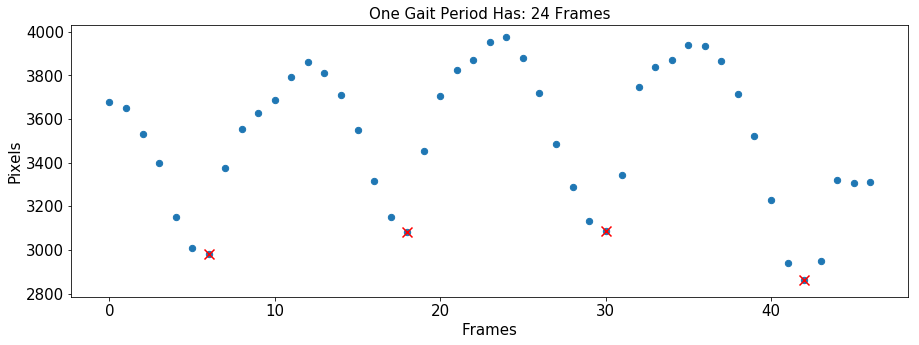

In [55]:
# For calculating and selecting one gait period frames
for path in img_path:
    count += 1
    if count > 4 and count < (num - 4):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_list.append(img)
        foreground_pixels = pixels_sum(img, img.shape[0], img.shape[1])
        foreground_pixels_list.append(foreground_pixels)
for i in range(len(foreground_pixels_list) - 3):
    if foreground_pixels_list[i + 3] < foreground_pixels_list[i + 2] and foreground_pixels_list[i + 3] < \
            foreground_pixels_list[i + 1] and foreground_pixels_list[i + 3] < foreground_pixels_list[i + 4] and \
            foreground_pixels_list[i + 3] < foreground_pixels_list[i + 5]:
        gait_period_flag_value_list.append(foreground_pixels_list[i + 3])
        gait_period_flag_list.append(i)
for i in range(len(gait_period_flag_value_list)):
    gait_period_flag_real_index_list.append(gait_period_flag_list[i] + 3)
print("gait_period_flag_real_index_list", gait_period_flag_real_index_list)
print("gait_period_flag_list", gait_period_flag_list)
one_gait_period_img_list = (img_list[gait_period_flag_list[0] + 3:gait_period_flag_list[2] + 3])
print("Selected frames: ", len(img_list))
print("One Gait Period Has: ", len(one_gait_period_img_list), "frames")

# Plotting gait period graph
x = range(len(foreground_pixels_list))
x1 = gait_period_flag_real_index_list
y = foreground_pixels_list
y1 = gait_period_flag_value_list
plt.figure(figsize=(15,5))
plt.title("One Gait Period Has: " + str(len(one_gait_period_img_list)) + " Frames", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Frames", fontsize=15)
plt.ylabel("Pixels", fontsize=15)
plt.scatter(x, y, s=40) 
plt.scatter(x1, y1, c='red', marker='x', s=100) 
plt.show()


In [56]:
# For debugging, show selectted frames 
# for i in range(len(one_gait_period_img_list)):
#     img_xx = one_gait_period_img_list[i]
#     cv2.namedWindow('One gait Period', flags=0)
#     cv2.imshow('One gait Period', img_xx)
#     cv2.waitKey()
# cv2.destroyAllWindows()

In [57]:
# For getting Centroid of binary_silhouette
for i in range(len(one_gait_period_img_list)):
    gait_period_frame = one_gait_period_img_list[i]
    m = cv2.moments(gait_period_frame)  # moment
    cx, cy = m['m10'] / m['m00'], m['m01'] / m['m00']  # Centroid of binary_silhouette
    cx = int(cx)  # For Normalise & Align
    cx_right = gait_period_frame.shape[1] - cx
    cx_right_list.append(cx_right)
    cx_list.append(cx)
    edge_to_head = find_dis_edge_to_head(gait_period_frame, gait_period_frame.shape[0], gait_period_frame.shape[1])
    edge_to_feet = find_dis_edge_to_head(gait_period_frame, gait_period_frame.shape[0], gait_period_frame.shape[1])
    edge_to_head_list.append(edge_to_head)
    edge_to_feet_list.append(edge_to_feet)
cx_left_min = cx_list[cx_list.index(min(cx_list))]
cx_right_min = cx_right_list[cx_right_list.index(min(cx_right_list))]
edge_to_head_min = edge_to_head_list[edge_to_head_list.index(min(edge_to_head_list))]
edge_to_feet_min = edge_to_feet_list[edge_to_feet_list.index(min(edge_to_feet_list))]
min_dis = min(cx_right_min, cx_left_min)
print("Minimum distance of all frames from centroid to left edge: ", cx_left_min)
print("Minimum distance of all frames from centroid to right edge: ", cx_right_min)
print("Minimum distance of all frames from top dege to subjects' heads: ", edge_to_head_min)
print("Minimum distance of all frames from bottom dege to subjects' feet: ", edge_to_feet_min)

Minimum distance of all frames from centroid to left edge:  127
Minimum distance of all frames from centroid to right edge:  72
Minimum distance of all frames from top dege to subjects' heads:  48
Minimum distance of all frames from bottom dege to subjects' feet:  48


In [59]:
# Crop according to centroid of binary_silhouette
for i in range(len(one_gait_period_img_list)):
    cx = cx_list[i]
    gait_period_frame = one_gait_period_img_list[i]
    crop = gait_period_frame[edge_to_head_min:img.shape[0]-edge_to_feet_min+5, cx - min_dis:cx + min_dis]
#     cv2.namedWindow('Crop', flags=0)
#     cv2.imshow('Crop', crop)
#     cv2.waitKey()
    crop = crop.astype(np.uint64)
    binary_silhouette_crop_list.append(crop)
# cv2.destroyAllWindows()

In [61]:
for i in range(len(one_gait_period_img_list)):
    if i == 0:
        gei_sum = binary_silhouette_crop_list[0]
        # print("gei_sum", gei_sum.shape)
        # print("gei_sum", binary_silhouette_crop_list[1].shape)
    if i > 0:
        gei_sum = cv2.add(gei_sum, binary_silhouette_crop_list[i])
gei = gei_sum / len(one_gait_period_img_list)
gei = gei.astype(np.uint8)
cv2.namedWindow('GEI', flags=0)
cv2.imshow('GEI', gei)
cv2.waitKey()
print("GEI.shape: ",gei.shape)
cv2.destroyAllWindows()

GEI.shape:  (149, 144)
